In [64]:
import os
import glob
import pickle
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from google.colab import drive
from collections import defaultdict
from typing import Dict, List, Optional, Tuple

In [111]:
drive.mount('/content/drive', force_remount=True)
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/q_learning_results'
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/dqn_results'

Mounted at /content/drive


In [113]:
def analyze_q_DQN_learning_performance():
    """
    Q-Learning Comprehensive Performance Analysis

    """
    df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/q_learning_results/q_learning_training_log_1.xlsx')
    df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/q_learning_results/q_learning_training_log_2.xlsx')
    df3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/q_learning_results/q_learning_training_log_3.xlsx')
    df4 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/q_learning_results/q_learning_training_log_4.xlsx')
    df_dqn1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dqn_results/dqn_training_log_1.xlsx')
    df_dqn2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dqn_results/dqn_training_log_2.xlsx')

    df1['Run'] = 'Run 1 (ε_decay=0.9995)'
    df2['Run'] = 'Run 2 (ε_decay=0.99995)'
    df3['Run'] = 'Run 3 (ε_decay=0.9995)'
    df4['Run'] = 'Run 4 (ε_decay=0.99995)'

# Q-learning (1) result

In [66]:
# ====1==== q_table_viewer.py
import pickle
import pandas as pd
import json

def view_q_table(file_path):
    with open(file_path, 'rb') as f:
        q_table = pickle.load(f)
    print(f"상태 개수: {len(q_table)}")
    print(f"첫 5개 상태:")
    for i, (state, actions) in enumerate(list(q_table.items())[:5]):
        print(f"{state}: {actions}")

def view_logs(file_path):
    df = pd.read_excel(file_path)
    print(df.head(10))
    print(f"\n총 에피소드: {len(df)}")

def view_params(file_path):
    with open(file_path, 'r') as f:
        params = json.load(f)
    for k, v in params.items():
        print(f"{k}: {v}")

# 실행
view_q_table('/content/drive/MyDrive/Colab Notebooks/q_learning_results/q_table_poop_avoidance_1.pkl')
view_logs('/content/drive/MyDrive/Colab Notebooks/q_learning_results/q_learning_training_log_1.xlsx')
view_params('/content/drive/MyDrive/Colab Notebooks/q_learning_results/q_learning_hyperparam_1.json')


상태 개수: 79786
첫 5개 상태:
(4, 5, 0, 6, 2, 3, 0, 1): [-3.86521854 -1.46187882 -1.24028821 -1.46889412  2.54346393]
(4, 6, 0, 6, 2, 3, 0, 1): [-4.37896797 -1.86782741 -5.69288583  0.8973023  -2.91284949]
(4, 6, 1, 6, 2, 3, 0, 1): [0.2446346  2.68547126 0.50397935 0.24833698 0.36413179]
(4, 6, 2, 6, 2, 3, 0, 1): [ 0.15546422 -3.79098592  0.23631395  0.26074518  2.0698058 ]
(4, 5, 2, 6, 2, 3, 0, 1): [ 0.32411134  0.29001717  0.30111877 -3.14611905  1.08508817]
   Episode  Score  Total_Reward   Epsilon  Steps
0        1    247 -2.253000e+02  0.999500    247
1        2    244 -2.256000e+02  0.999000    244
2        3    500 -5.000000e+01  0.998501    500
3        4    500  5.000000e+01  0.998001    500
4        5    500  2.426670e-13  0.997502    500
5        6    500 -5.000000e+01  0.997004    500
6        7    500 -5.000000e+01  0.996505    500
7        8    500 -5.000000e+01  0.996007    500
8        9    466 -2.034000e+02  0.995509    466
9       10    393 -2.107000e+02  0.995011    393

총 에

# When you want to check each individual piece as a whole

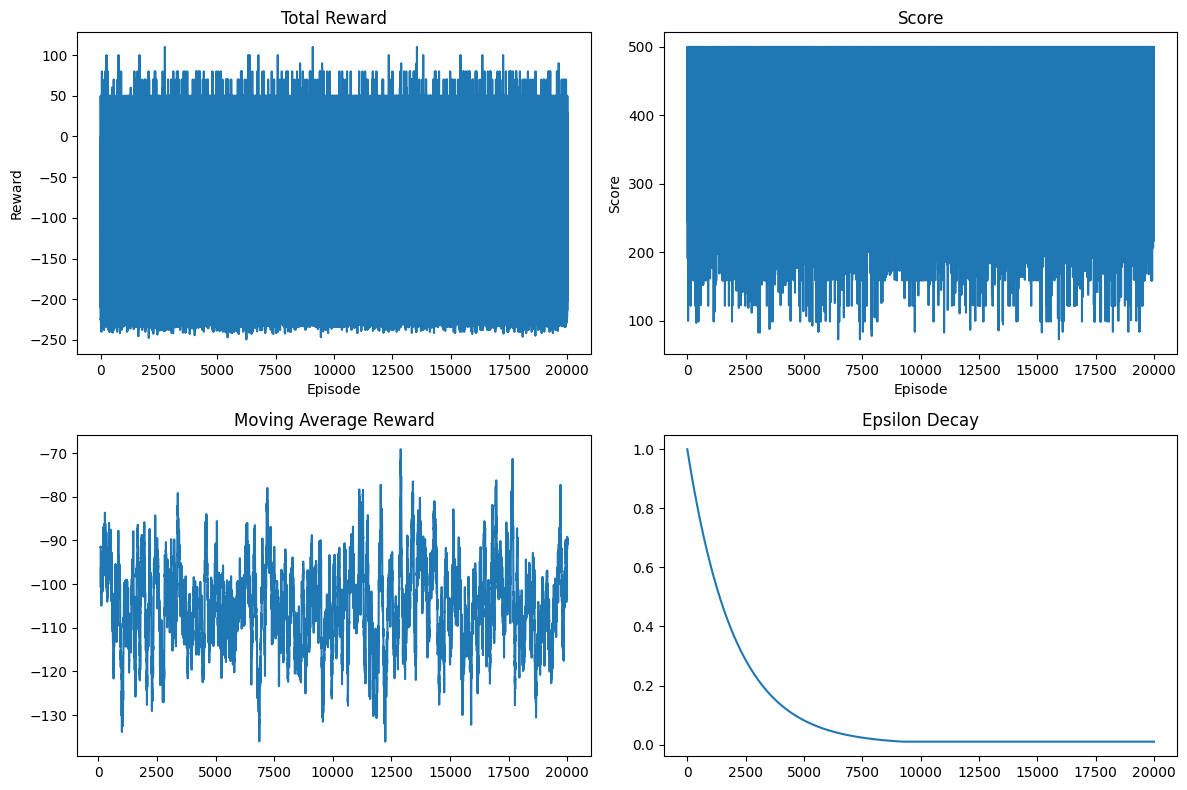

평균 보상: -104.80
최대 보상: 110.00
최종 보상: -202.20


In [108]:
# 학습 파일
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/q_learning_results/q_learning_training_log_1.xlsx')

# 성능 분석
plt.figure(figsize=(12, 8))

# 1. 보상 곡선
plt.subplot(2, 2, 1)
plt.plot(df['Episode'], df['Total_Reward'])
plt.title('Total Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')

# 2. 점수 곡선
plt.subplot(2, 2, 2)
plt.plot(df['Episode'], df['Score'])
plt.title('Score')
plt.xlabel('Episode')
plt.ylabel('Score')

# 3. 이동평균
plt.subplot(2, 2, 3)
plt.plot(df['Episode'], df['Total_Reward'].rolling(100).mean())
plt.title('Moving Average Reward')

# 4. Epsilon
plt.subplot(2, 2, 4)
plt.plot(df['Episode'], df['Epsilon'])
plt.title('Epsilon Decay')

plt.tight_layout()
plt.show()

# 성능 지표
print(f"평균 보상: {df['Total_Reward'].mean():.2f}")
print(f"최대 보상: {df['Total_Reward'].max():.2f}")
print(f"최종 보상: {df['Total_Reward'].iloc[-1]:.2f}")

# 1. Q-Learning Comprehensive Performance Analysis

In [69]:
# 1. Performance Analysis
def analyze_performance(df1, df2):
    """
    performance reword and point (4)

    """
    plt.figure(figsize=(15, 6))


    # Compensation Performance
    plt.subplot(1, 2, 1)
    plt.plot(df1['Episode'], df1['Total_Reward'], alpha=0.7, label='Run 1 (0.9995)', color='red')
    plt.plot(df2['Episode'], df2['Total_Reward'], alpha=0.7, label='Run 2 (0.99995)', color='blue')
    plt.plot(df3['Episode'], df3['Total_Reward'], alpha=0.7, label='Run 3 (0.9995)', color='red', linestyle='--')
    plt.plot(df4['Episode'], df4['Total_Reward'], alpha=0.7, label='Run 4 (0.99995)', color='blue', linestyle='--')
    plt.axhline(0, color='green', linestyle=':', alpha=0.5, label='Target (0)')
    plt.title('Comparison of reward performance (4 experiments)')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 점수 성능
    plt.subplot(1, 2, 2)
    plt.plot(df1['Episode'], df1['Score'], alpha=0.6, label='Run 1', color='red')
    plt.plot(df2['Episode'], df2['Score'], alpha=0.6, label='Run 2', color='blue')
    plt.plot(df3['Episode'], df3['Score'], alpha=0.6, label='Run 3', color='red', linestyle='--')
    plt.plot(df4['Episode'], df4['Score'], alpha=0.6, label='Run 4', color='blue', linestyle='--')
    plt.axhline(500, color='green', linestyle=':', alpha=0.5, label='Max Score')
    plt.title('Comparison of reward performance (4 experiments)')
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Performance metrics output
    dfs = [df1, df2, df3, df4]
    print("=== 성능 분석 결과 (4개 실험) ===")
    for i, df in enumerate(dfs, 1):
        print(f"Run {i} - 평균 보상: {df['Total_Reward'].mean():.2f}, 평균 점수: {df['Score'].mean():.2f}")

    # 그룹별 평균 (epsilon 값별)
    fast_decay = [df1['Total_Reward'].mean(), df3['Total_Reward'].mean()]
    slow_decay = [df2['Total_Reward'].mean(), df4['Total_Reward'].mean()]
    print(f"\n빠른 감소(0.9995) 평균: {np.mean(fast_decay):.2f}")
    print(f"느린 감소(0.99995) 평균: {np.mean(slow_decay):.2f}")


=== 성능 분석 결과 (4개 실험) ===


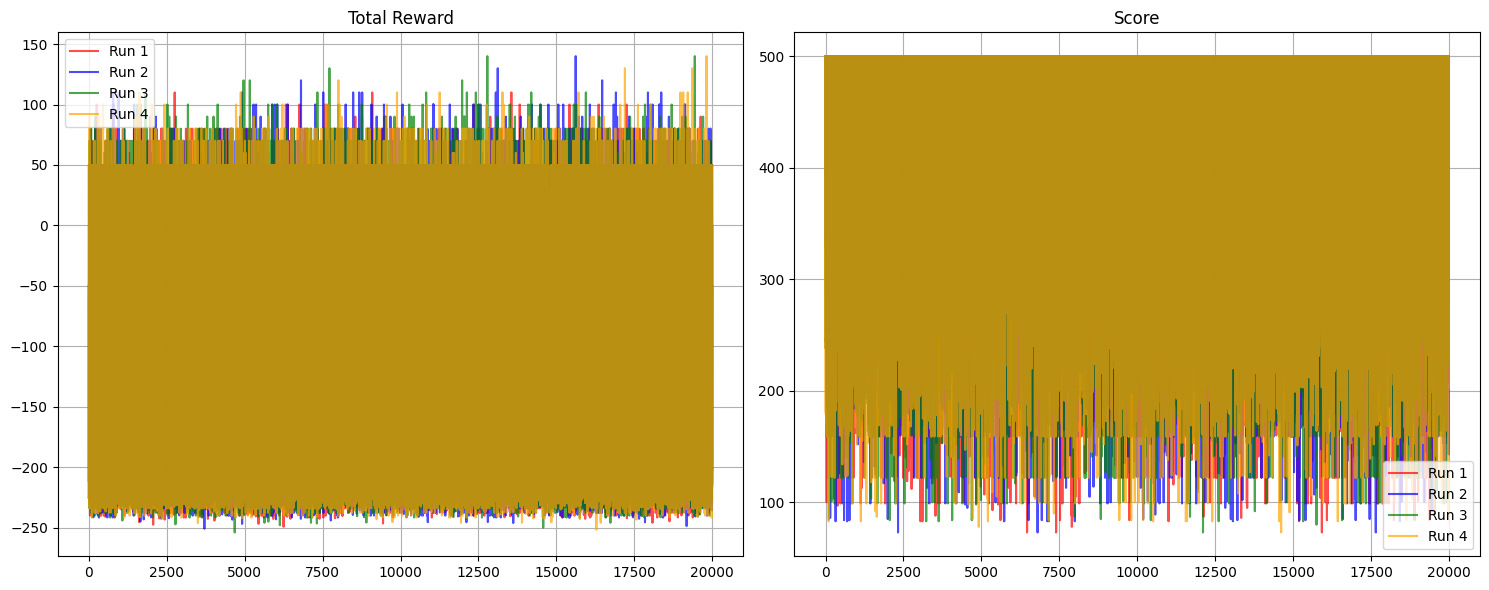

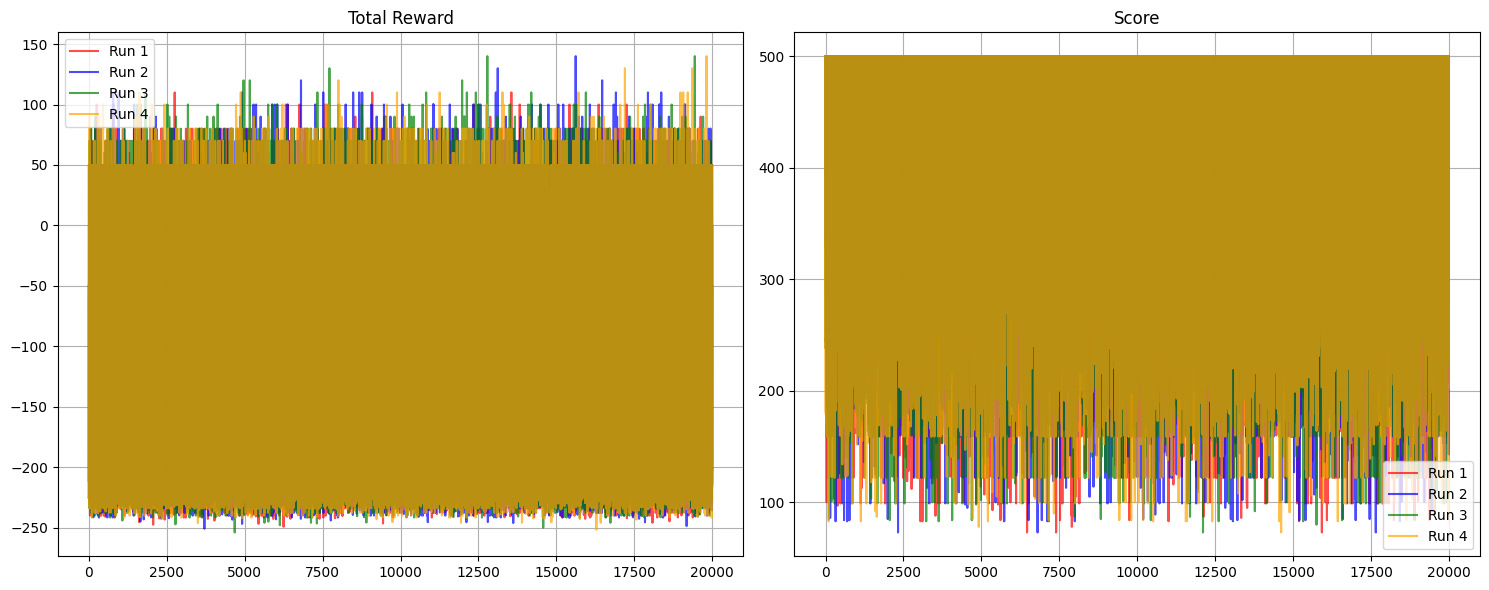

In [96]:
print("=== 성능 분석 결과 (4개 실험) ===")
analyze_performance_four(df1, df2, df3, df4)

plt.show()
analyze_performance_four(df1, df2, df3, df4)



# 2. Learning rate analysis (4 experiments)

In [70]:
# 2. Learning rate analysis (4 experiments)
def analyze_learning_speed_four(df1, df2, df3, df4):
    """
    Learning rate analysis (4 experiments)

    """

    plt.figure(figsize=(15, 6))

    # moving average
    window = 500
    dfs = [df1, df2, df3, df4]
    colors = ['red', 'blue', 'red', 'blue']
    styles = ['-', '-', '--', '--']

    plt.subplot(1, 2, 1)
    for i, (df, color, style) in enumerate(zip(dfs, colors, styles)):
        ma = df['Total_Reward'].rolling(window).mean()
        plt.plot(df['Episode'], ma, linewidth=2,
                label=f'Run {i+1}', color=color, linestyle=style)
    plt.title(f'Moving average (moving Averag {window})')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # initial Learning Slope
    early_episodes = 2000
    plt.subplot(1, 2, 2)
    slopes = []

    for i, (df, color, style) in enumerate(zip(dfs, colors, styles)):
        x = df['Episode'][:early_episodes]
        y = df['Total_Reward'][:early_episodes]
        slope = np.polyfit(x, y, 1)[0]
        slopes.append(slope)

        plt.plot(x, y, alpha=0.3, color=color, linestyle=style)
        plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),
                color=color, linestyle=style, linewidth=2,
                label=f'Run {i+1}: {slope:.4f}')

    plt.title(f'initial learning rate (fist {early_episodes} episodes)')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("=== Learning Speed Analysis Results (4) ===")
    for i, slope in enumerate(slopes, 1):
        print(f"Run {i} - initial Improvement Rate: {slope:.4f} reward/episode")

=== Learning Speed Analysis Results (4) ===


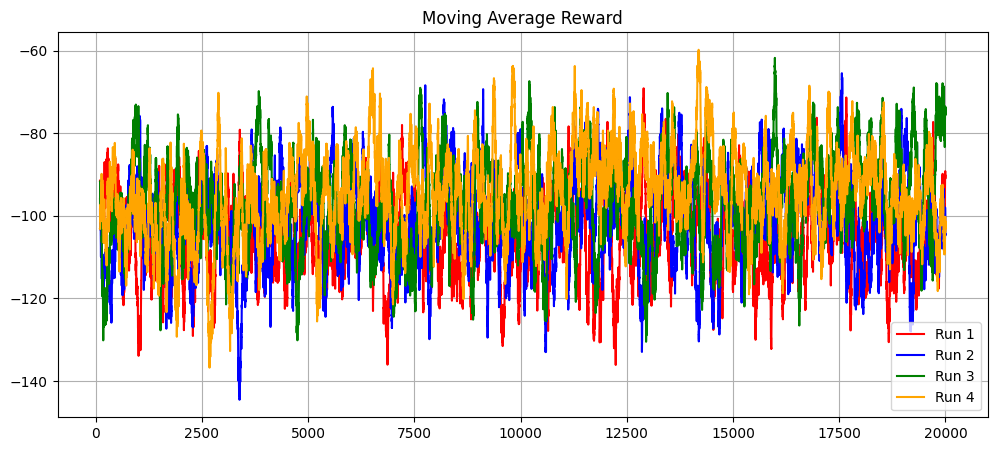

In [98]:
print("=== Learning Speed Analysis Results (4) ===")
analyze_learning_speed_four(df1, df2, df3, df4)
plt.show()

# 3.Stability analysis (4 experiments)

In [71]:
def analyze_stability_four(df1, df2, df3, df4):
    """
    Stability analysis (4 experiments)

    """
    plt.figure(figsize=(15, 6))

    dfs = [df1, df2, df3, df4]
    colors = ['red', 'blue', 'red', 'blue']
    styles = ['-', '-', '--', '--']

    # standard deviation trend
    window = 1000
    plt.subplot(1, 2, 1)
    for i, (df, color, style) in enumerate(zip(dfs, colors, styles)):
        std = df['Total_Reward'].rolling(window).std()
        plt.plot(df['Episode'], std,
                label=f'Run {i+1}', color=color, linestyle=style)
    plt.title('stability (Standard Deviation)')
    plt.xlabel('Episode')
    plt.ylabel('Reward Standard Deviation')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # reward distribution (separate without overlapping)
    plt.subplot(1, 2, 2)
    bins = np.linspace(-300, 100, 50)
    for i, (df, color, style) in enumerate(zip(dfs, colors, styles)):
        plt.hist(df['Total_Reward'], bins=bins, alpha=0.4,
                label=f'Run {i+1}', color=color, density=True)
    plt.title('reward distributio')
    plt.xlabel('Total Reward')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

=== Stability Analysis Results (4) ===


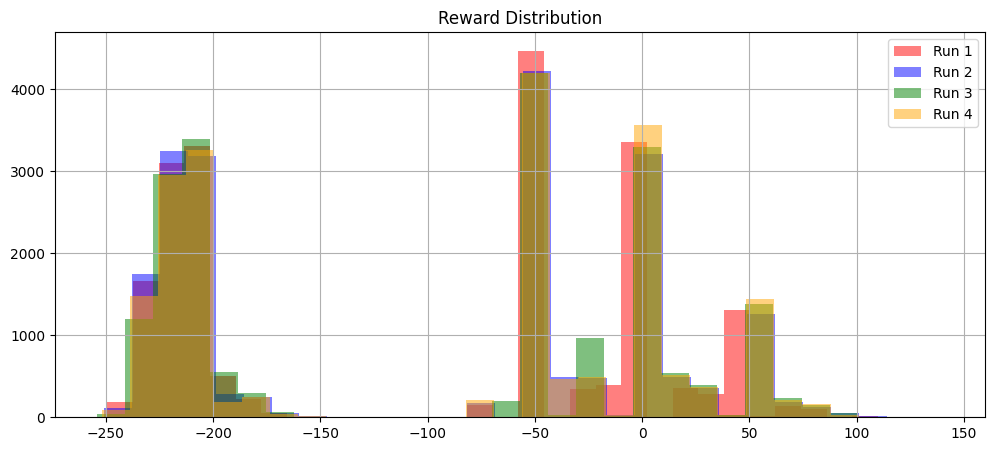

In [99]:
print("=== Stability Analysis Results (4) ===")
analyze_stability_four(df1, df2, df3, df4)
plt.show()

# 4. Learning efficiency analysis (4 experiments)

In [94]:
# Learning efficiency analysis (4 experiments)
def analyze_efficiency_four(df1, df2, df3, df4):
    """
    Learning efficiency analysis (4 experiments)
    """
    plt.figure(figsize=(15, 6))

    dfs = [df1, df2, df3, df4]
    colors = ['red', 'blue', 'red', 'blue']
    styles = ['-', '-', '--', '--']

    # Epsilon reduced comparison
    plt.subplot(1, 2, 1)
    for i, (df, color, style) in enumerate(zip(dfs, colors, styles)):
        plt.plot(df['Episode'], df['Epsilon'],
                label=f'Run {i+1}', color=color, linestyle=style)
    plt.title('Exploration-Exploitation Balance (Epsilon)')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # comparison of performance achievement rates
    plt.subplot(1, 2, 2)
    metrics = ['Highest score\nAchievement rate', 'Stable performance\nAchievement rate']

    max_scores = []
    stable_scores = []

    for df in dfs:
        max_score_rate = (df['Score'] == 500).sum() / len(df) * 100
        stable_rate = (df['Total_Reward'] > -100).sum() / len(df) * 100
        max_scores.append(max_score_rate)
        stable_scores.append(stable_rate)

    x = np.arange(len(metrics))
    width = 0.2

    for i in range(4):
        offset = (i - 1.5) * width
        values = [max_scores[i], stable_scores[i]]
        plt.bar(x + offset, values, width,
                label=f'Run {i+1}', color=colors[i], alpha=0.7)

    plt.title('Comparison of learning efficiency')
    plt.xlabel('scale')
    plt.ylabel('Achievement rate (%)')
    plt.xticks(x, metrics)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("=== learning efficiency analysis (4 experiments) ===")
    for i, df in enumerate(dfs, 1):
        max_count = (df['Score'] == 500).sum()
        stable_count = (df['Total_Reward'] > -100).sum()
        print(f"Run {i} - max point: {max_count} episode ({max_count/len(df)*100:.1f}%), "
              f"Stability performance: {stable_count} episode({stable_count/len(df)*100:.1f}%)")

=== learning efficiency analysis (4 experiments) ===


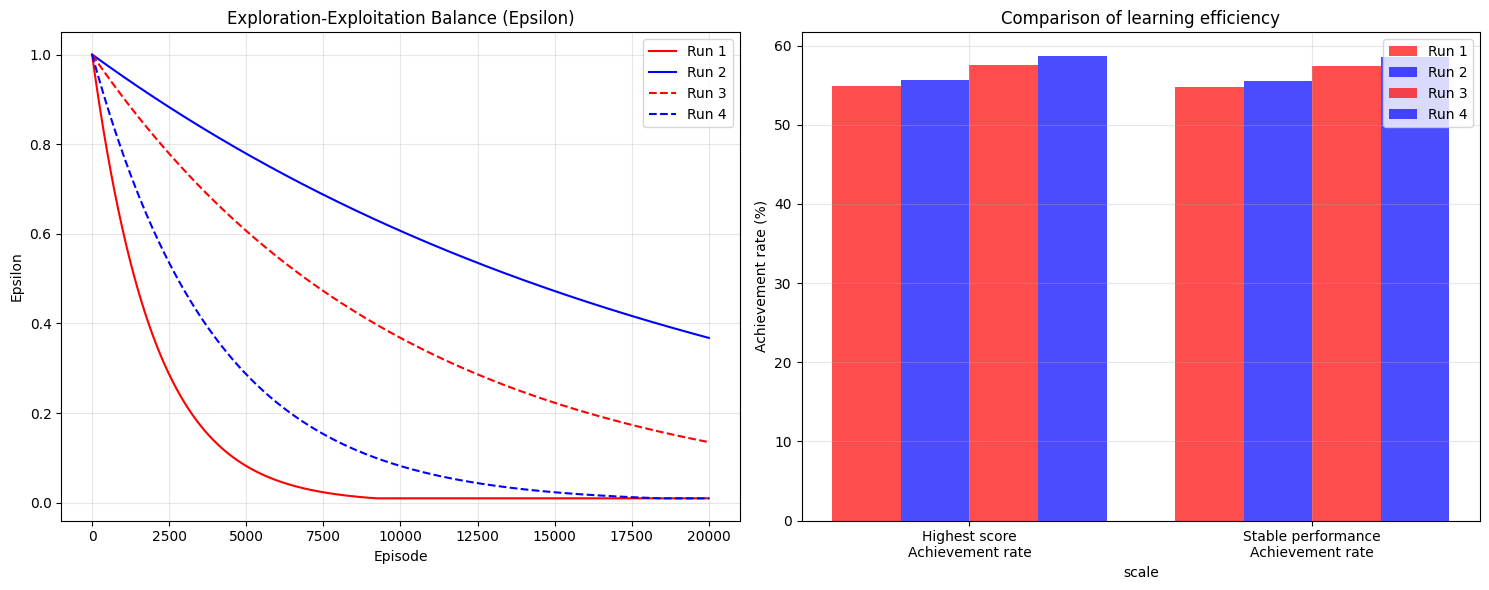

=== learning efficiency analysis (4 experiments) ===
Run 1 - max point: 10976 episode (54.9%), Stability performance: 10950 episode(54.8%)
Run 2 - max point: 11142 episode (55.7%), Stability performance: 11117 episode(55.6%)
Run 3 - max point: 11521 episode (57.6%), Stability performance: 11493 episode(57.5%)
Run 4 - max point: 11751 episode (58.8%), Stability performance: 11718 episode(58.6%)


In [100]:
print("=== learning efficiency analysis (4 experiments) ===")
analyze_efficiency_four(df1, df2, df3, df4)
plt.show()

# 5. Complete Experimental Performance Summary

In [105]:
# 4 Experiments Performance Summary
dfs = [df1, df2, df3, df4]
labels = ['Run 1 (ε=0.9995)', 'Run 2 (ε=0.99995)', 'Run 3 (ε=0.9995)', 'Run 4 (ε=0.99995)']

print("=== Complete Experimental Performance Summary ===")
print("-" * 70)

# Individual Performance
for i, (df, label) in enumerate(zip(dfs, labels)):
    avg_reward = df['Total_Reward'].mean()
    max_reward = df['Total_Reward'].max()
    final_reward = df['Total_Reward'].iloc[-1]
    avg_score = df['Score'].mean()
    max_score_count = (df['Score'] == 500).sum()

    print(f"{label}:")
    print(f"  Average Reward: {avg_reward:.2f}")
    print(f"  Maximum Reward: {max_reward:.2f}")
    print(f"  Final Reward: {final_reward:.2f}")
    print(f"  Average Score: {avg_score:.2f}")
    print(f"  Max Score Achievement: {max_score_count} times ({max_score_count/len(df)*100:.1f}%)")
    print()

# Group Comparison
fast_decay = [df1['Total_Reward'].mean(), df3['Total_Reward'].mean()]
slow_decay = [df2['Total_Reward'].mean(), df4['Total_Reward'].mean()]

print("=== Group Performance Comparison ===")
print(f"Fast Decay (0.9995) Average: {np.mean(fast_decay):.2f} ± {np.std(fast_decay):.2f}")
print(f"Slow Decay (0.99995) Average: {np.mean(slow_decay):.2f} ± {np.std(slow_decay):.2f}")

# Best Performance
best_run = np.argmax([df['Total_Reward'].mean() for df in dfs]) + 1
print(f"\nBest Performance: Run {best_run}")

# Statistical Significance
from scipy import stats
t_stat, p_value = stats.ttest_ind(fast_decay, slow_decay)
print(f"\nStatistical Test (Fast vs Slow):")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.3f}")
print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

=== Complete Experimental Performance Summary ===
----------------------------------------------------------------------
Run 1 (ε=0.9995):
  Average Reward: -104.80
  Maximum Reward: 110.00
  Final Reward: -202.20
  Average Score: 428.21
  Max Score Achievement: 10976 times (54.9%)

Run 2 (ε=0.99995):
  Average Reward: -101.79
  Maximum Reward: 140.00
  Final Reward: -50.00
  Average Score: 430.32
  Max Score Achievement: 11142 times (55.7%)

Run 3 (ε=0.9995):
  Average Reward: -97.14
  Maximum Reward: 140.00
  Final Reward: -214.20
  Average Score: 434.12
  Max Score Achievement: 11521 times (57.6%)

Run 4 (ε=0.99995):
  Average Reward: -94.72
  Maximum Reward: 140.00
  Final Reward: -50.00
  Average Score: 436.30
  Max Score Achievement: 11751 times (58.8%)

=== Group Performance Comparison ===
Fast Decay (0.9995) Average: -100.97 ± 3.83
Slow Decay (0.99995) Average: -98.26 ± 3.53

Best Performance: Run 4

Statistical Test (Fast vs Slow):
  t-statistic: -0.520
  p-value: 0.655
  Sign

In [104]:
# 4개 실험 성능 요약
dfs = [df1, df2, df3, df4]
labels = ['Run 1 (ε=0.9995)', 'Run 2 (ε=0.99995)', 'Run 3 (ε=0.9995)', 'Run 4 (ε=0.99995)']

print("=== 전체 실험 성능 요약 ===")
print("-" * 60)

# 개별 성능
for i, (df, label) in enumerate(zip(dfs, labels)):
    avg_reward = df['Total_Reward'].mean()
    max_reward = df['Total_Reward'].max()
    final_reward = df['Total_Reward'].iloc[-1]
    avg_score = df['Score'].mean()
    max_score_count = (df['Score'] == 500).sum()

    print(f"{label}:")
    print(f"  평균 보상: {avg_reward:.2f}")
    print(f"  최대 보상: {max_reward:.2f}")
    print(f"  최종 보상: {final_reward:.2f}")
    print(f"  평균 점수: {avg_score:.2f}")
    print(f"  최고점수 달성: {max_score_count}회 ({max_score_count/len(df)*100:.1f}%)")
    print()

# 그룹별 비교
fast_decay = [df1['Total_Reward'].mean(), df3['Total_Reward'].mean()]
slow_decay = [df2['Total_Reward'].mean(), df4['Total_Reward'].mean()]

print("=== 그룹별 성능 비교 ===")
print(f"빠른 감소(0.9995) 평균: {np.mean(fast_decay):.2f} ± {np.std(fast_decay):.2f}")
print(f"느린 감소(0.99995) 평균: {np.mean(slow_decay):.2f} ± {np.std(slow_decay):.2f}")

# 최고 성능
best_run = np.argmax([df['Total_Reward'].mean() for df in dfs]) + 1
print(f"\n최고 성능: Run {best_run}")

=== 전체 실험 성능 요약 ===
------------------------------------------------------------
Run 1 (ε=0.9995):
  평균 보상: -104.80
  최대 보상: 110.00
  최종 보상: -202.20
  평균 점수: 428.21
  최고점수 달성: 10976회 (54.9%)

Run 2 (ε=0.99995):
  평균 보상: -101.79
  최대 보상: 140.00
  최종 보상: -50.00
  평균 점수: 430.32
  최고점수 달성: 11142회 (55.7%)

Run 3 (ε=0.9995):
  평균 보상: -97.14
  최대 보상: 140.00
  최종 보상: -214.20
  평균 점수: 434.12
  최고점수 달성: 11521회 (57.6%)

Run 4 (ε=0.99995):
  평균 보상: -94.72
  최대 보상: 140.00
  최종 보상: -50.00
  평균 점수: 436.30
  최고점수 달성: 11751회 (58.8%)

=== 그룹별 성능 비교 ===
빠른 감소(0.9995) 평균: -100.97 ± 3.83
느린 감소(0.99995) 평균: -98.26 ± 3.53

최고 성능: Run 4


# DQN analyzer

# DQN

In [114]:
model = torch.load('/content/drive/MyDrive/Colab Notebooks/dqn_results/dqn_model_weights_1.pth', map_location='cpu')
model = torch.load('/content/drive/MyDrive/Colab Notebooks/dqn_results/dqn_model_weights_2.pth', map_location='cpu')

# 구조 확인
print("모델 구조:")
for name, param in model.items():
    print(f"{name}: {param.shape}")

# 파라미터 수
total_params = sum(p.numel() for p in model.values())
print(f"\n총 파라미터: {total_params:,}")

모델 구조:
fc1.weight: torch.Size([128, 8])
fc1.bias: torch.Size([128])
fc2.weight: torch.Size([128, 128])
fc2.bias: torch.Size([128])
fc3.weight: torch.Size([5, 128])
fc3.bias: torch.Size([5])

총 파라미터: 18,309


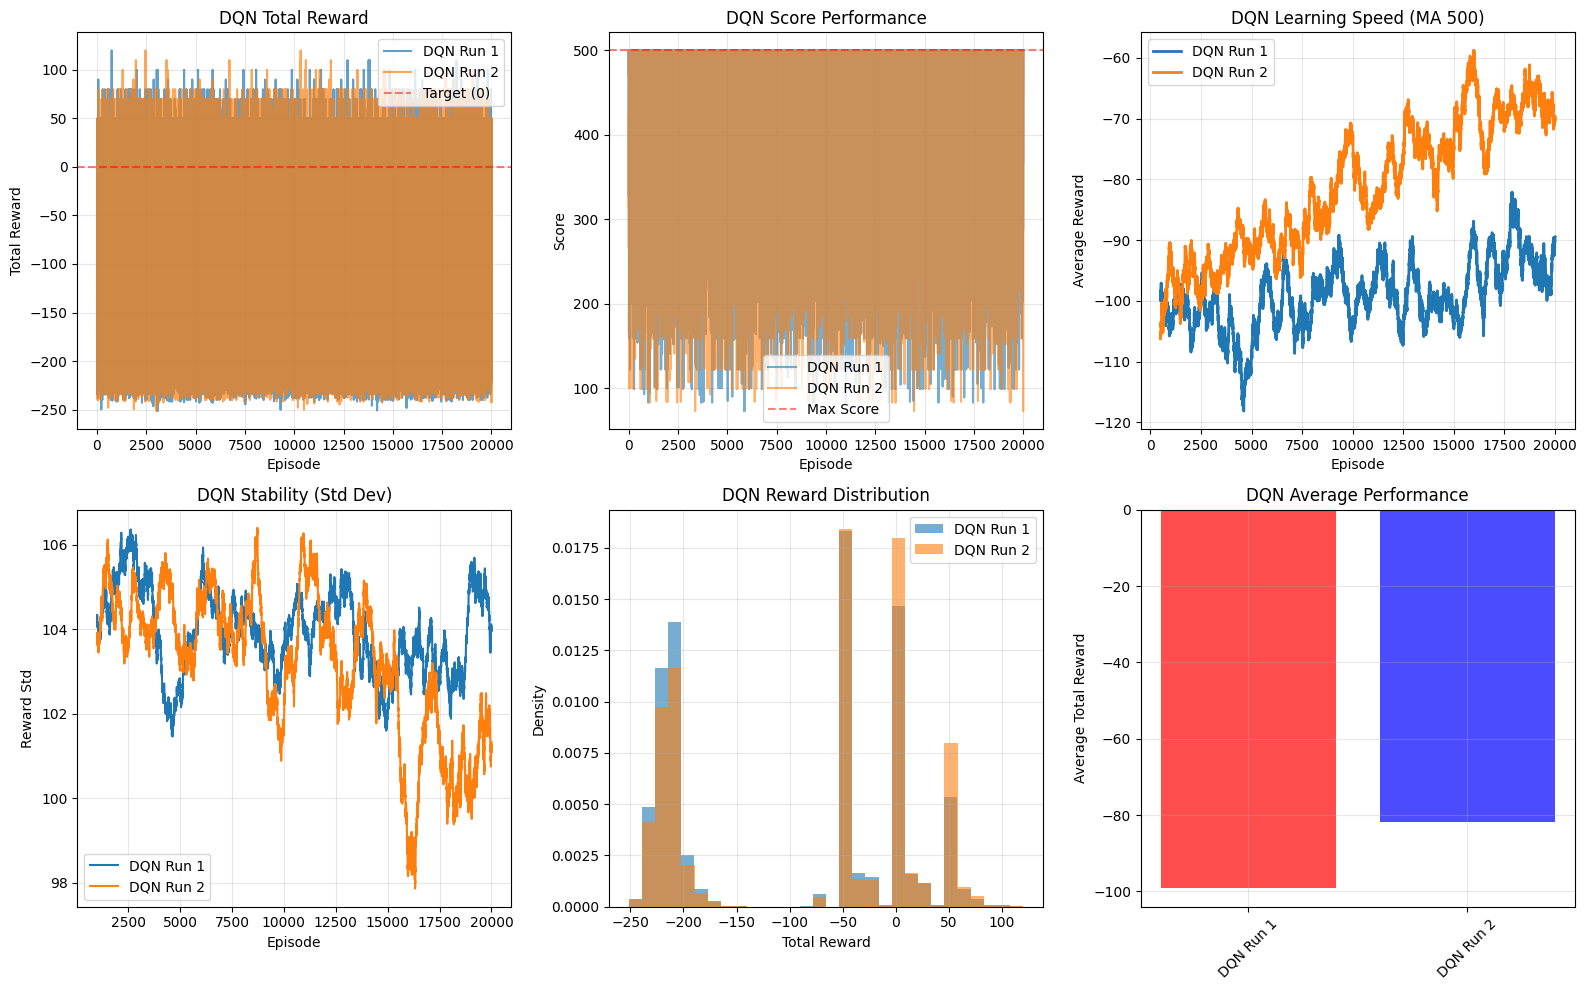

=== DQN Performance Analysis (2 Experiments) ===
------------------------------------------------------------
DQN Run 1:
  Average Reward: -99.03
  Maximum Reward: 120.00
  Final Reward: -213.20
  Average Score: 434.28
  Max Score Achievement: 11469 times (57.3%)
  Stable Performance: 11449 times (57.2%)

DQN Run 2:
  Average Reward: -81.75
  Maximum Reward: 120.00
  Final Reward: 0.00
  Average Score: 445.03
  Max Score Achievement: 12893 times (64.5%)
  Stable Performance: 12874 times (64.4%)

=== DQN Overall Summary ===
Overall Average Reward: -90.39
Run 1 vs Run 2 Difference: 17.29
Better Performance: DQN Run 2


In [119]:
# DQN 데이터 로드
df_dqn1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dqn_results/dqn_training_log_1.xlsx')
df_dqn2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dqn_results/dqn_training_log_2.xlsx')

# DQN 데이터 로드
df_dqn1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dqn_results/dqn_training_log_1.xlsx')
df_dqn2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dqn_results/dqn_training_log_2.xlsx')

# DQN 성능 분석
def analyze_dqn_performance(df1, df2):
    """DQN Performance Analysis (2 Experiments)"""
    plt.figure(figsize=(16, 10))

    # 1. 보상 성능
    plt.subplot(2, 3, 1)
    plt.plot(df1['Episode'], df1['Total_Reward'], alpha=0.7, label='DQN Run 1',)
    plt.plot(df2['Episode'], df2['Total_Reward'], alpha=0.7, label='DQN Run 2',)
    plt.axhline(0, color='red', linestyle='--', alpha=0.5, label='Target (0)')
    plt.title('DQN Total Reward')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. 점수 성능
    plt.subplot(2, 3, 2)
    plt.plot(df1['Episode'], df1['Score'], alpha=0.6, label='DQN Run 1',)
    plt.plot(df2['Episode'], df2['Score'], alpha=0.6, label='DQN Run 2',)
    plt.axhline(500, color='red', linestyle='--', alpha=0.5, label='Max Score')
    plt.title('DQN Score Performance')
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 3. 학습 속도 (이동평균)
    plt.subplot(2, 3, 3)
    window = 500
    ma1 = df1['Total_Reward'].rolling(window).mean()
    ma2 = df2['Total_Reward'].rolling(window).mean()
    plt.plot(df1['Episode'], ma1, linewidth=2, label='DQN Run 1', )
    plt.plot(df2['Episode'], ma2, linewidth=2, label='DQN Run 2', )
    plt.title(f'DQN Learning Speed (MA {window})')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 4. 안정성 (표준편차)
    plt.subplot(2, 3, 4)
    window = 1000
    std1 = df1['Total_Reward'].rolling(window).std()
    std2 = df2['Total_Reward'].rolling(window).std()
    plt.plot(df1['Episode'], std1, label='DQN Run 1', )
    plt.plot(df2['Episode'], std2, label='DQN Run 2', )
    plt.title('DQN Stability (Std Dev)')
    plt.xlabel('Episode')
    plt.ylabel('Reward Std')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 5. 보상 분포
    plt.subplot(2, 3, 5)
    plt.hist(df1['Total_Reward'], bins=30, alpha=0.6, label='DQN Run 1',density=True)
    plt.hist(df2['Total_Reward'], bins=30, alpha=0.6, label='DQN Run 2',density=True)
    plt.title('DQN Reward Distribution')
    plt.xlabel('Total Reward')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 6. 성능 요약
    plt.subplot(2, 3, 6)
    runs = ['DQN Run 1', 'DQN Run 2']
    means = [df1['Total_Reward'].mean(), df2['Total_Reward'].mean()]
    plt.bar(runs, means, color=colors, alpha=0.7)
    plt.title('DQN Average Performance')
    plt.ylabel('Average Total Reward')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 성능 지표 출력
    print("=== DQN Performance Analysis (2 Experiments) ===")
    print("-" * 60)

    dfs = [df1, df2]
    for i, df in enumerate(dfs, 1):
        avg_reward = df['Total_Reward'].mean()
        max_reward = df['Total_Reward'].max()
        final_reward = df['Total_Reward'].iloc[-1]
        avg_score = df['Score'].mean()
        max_score_count = (df['Score'] == 500).sum()
        stable_count = (df['Total_Reward'] > -100).sum()

        print(f"DQN Run {i}:")
        print(f"  Average Reward: {avg_reward:.2f}")
        print(f"  Maximum Reward: {max_reward:.2f}")
        print(f"  Final Reward: {final_reward:.2f}")
        print(f"  Average Score: {avg_score:.2f}")
        print(f"  Max Score Achievement: {max_score_count} times ({max_score_count/len(df)*100:.1f}%)")
        print(f"  Stable Performance: {stable_count} times ({stable_count/len(df)*100:.1f}%)")
        print()

    # 전체 요약
    overall_avg = (df1['Total_Reward'].mean() + df2['Total_Reward'].mean()) / 2
    print("=== DQN Overall Summary ===")
    print(f"Overall Average Reward: {overall_avg:.2f}")
    print(f"Run 1 vs Run 2 Difference: {abs(df1['Total_Reward'].mean() - df2['Total_Reward'].mean()):.2f}")

    # 더 나은 실행 판정
    if df1['Total_Reward'].mean() > df2['Total_Reward'].mean():
        print("Better Performance: DQN Run 1")
    else:
        print("Better Performance: DQN Run 2")

# 실행
analyze_dqn_performance(df_dqn1, df_dqn2)